# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


Simple Linear Regression
Coefficient (m): 2.012084035937595
Intercept (c): 4.098926064917187
Train MAE: 3.720590817861557
Test MAE: 3.0065617374915616
Train R2: 0.975531554789763
Test R2: 0.9817963850564473


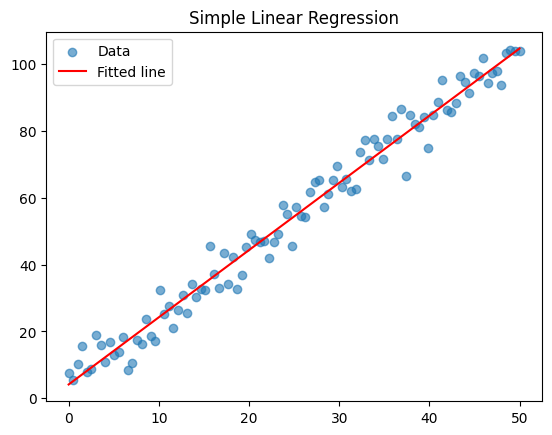

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)
X = np.linspace(0, 50, 100).reshape(-1, 1)
y = 2 * X.flatten() + 5 + np.random.randn(100) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Simple Linear Regression")
print("Coefficient (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, model.predict(X), color="red", label="Fitted line")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()


# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [4]:
np.random.seed(42)
x1 = np.random.randint(0, 50, 100)
x2 = np.random.randint(10, 100, 100)
y = 3*x1 + 2*x2 + 7 + np.random.randn(100)*10

X = np.column_stack((x1, x2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nMultiple Linear Regression")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))



Multiple Linear Regression
Coefficients: [2.88882416 2.06769693]
Intercept: 8.280965147569589
Train MAE: 7.405116334897355
Test MAE: 7.907513233852701
Train R2: 0.9861301510274789
Test R2: 0.977664738617227


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [5]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [6]:
os.listdir(path)

['airlines_flights_data.csv']

In [7]:
full_path = os.path.join(path,os.listdir(path)[0])

In [8]:
import pandas as pd
df = pd.read_csv(full_path)

In [9]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585



Polynomial Regression
Coefficients: [0.         2.03210268 1.5219785 ]
Intercept: 2.45389904540858
Train MAE: 2.238055780757456
Test MAE: 1.8019244317564271
Train R2: 0.9596943666527761
Test R2: 0.9509618002613022


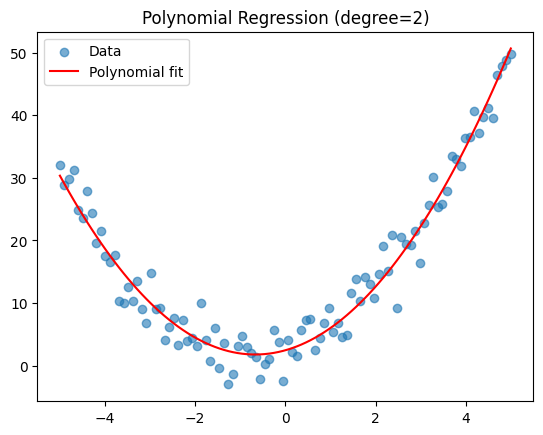

In [10]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 1.5*X.flatten()**2 + 2*X.flatten() + 3 + np.random.randn(100) * 3

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nPolynomial Regression")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, model.predict(X_poly), color="red", label="Polynomial fit")
plt.legend()
plt.title("Polynomial Regression (degree=2)")
plt.show()


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000

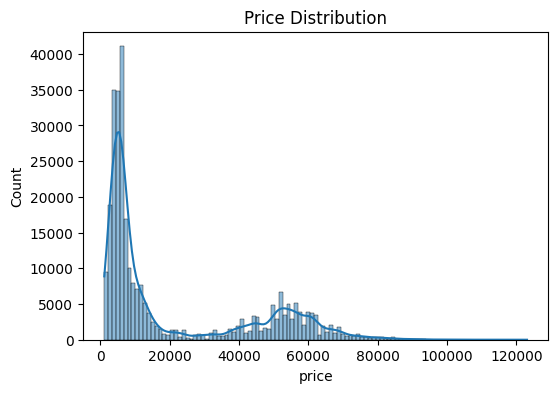

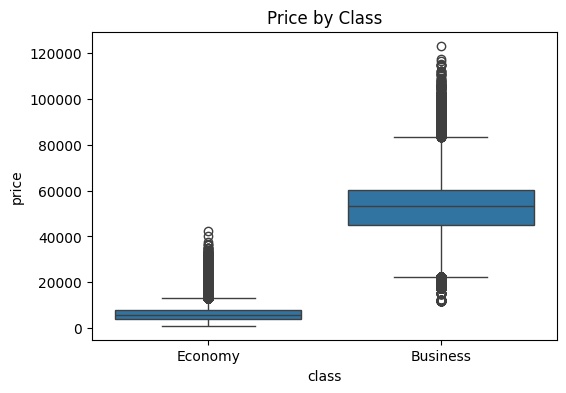

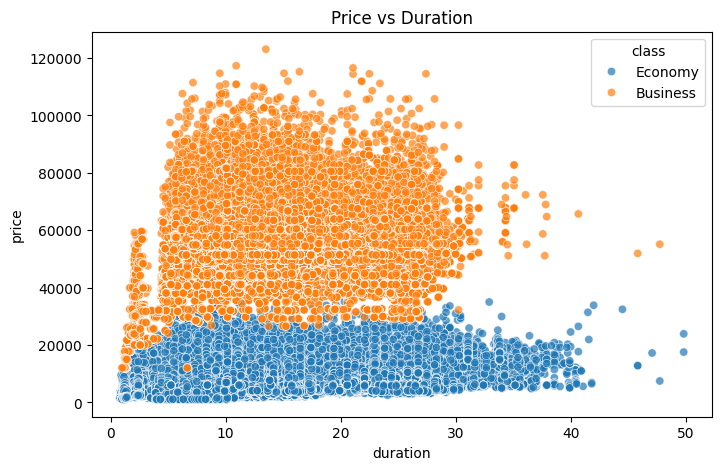

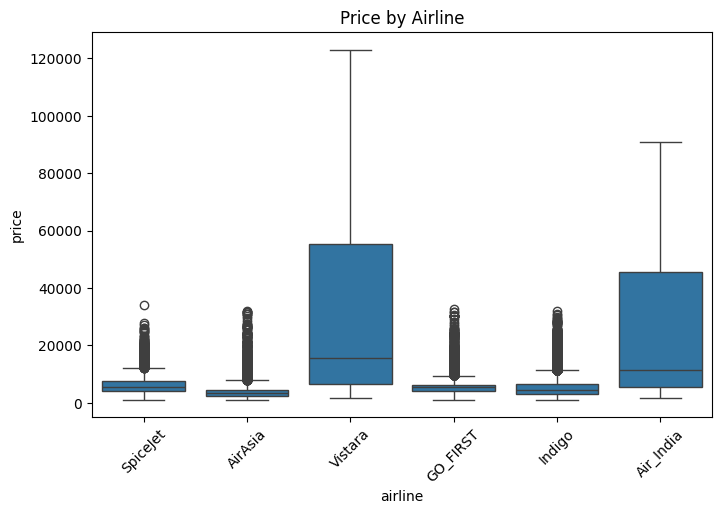

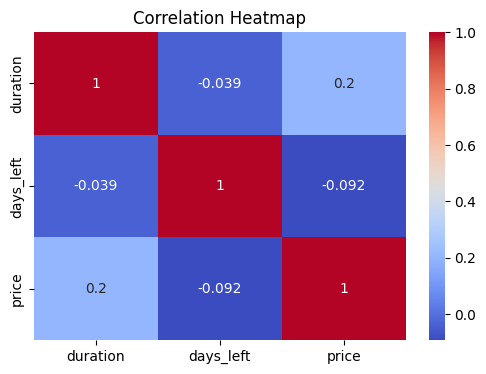


Flight Price Prediction Model
Train MAE: 4644.619349493887
Test MAE: 4622.928026977385
Train R2: 0.9046612161708429
Test R2: 0.9045986442402173


In [11]:
import seaborn as sns

df = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="class", y="price", data=df)
plt.title("Price by Class")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="duration", y="price", hue="class", data=df, alpha=0.7)
plt.title("Price vs Duration")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="airline", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price by Airline")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[["duration","days_left","price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

cat_cols = ["airline","flight","source_city","departure_time","stops","arrival_time","destination_city","class"]
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nFlight Price Prediction Model")
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


In [12]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000

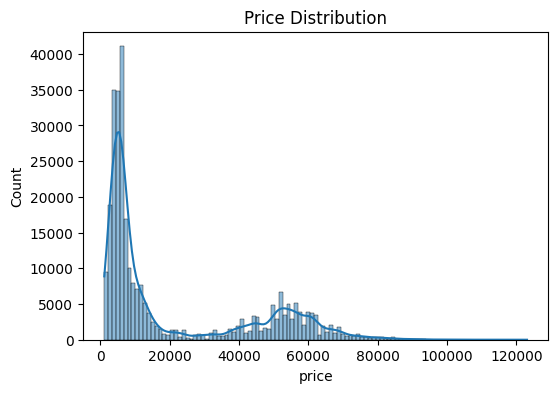

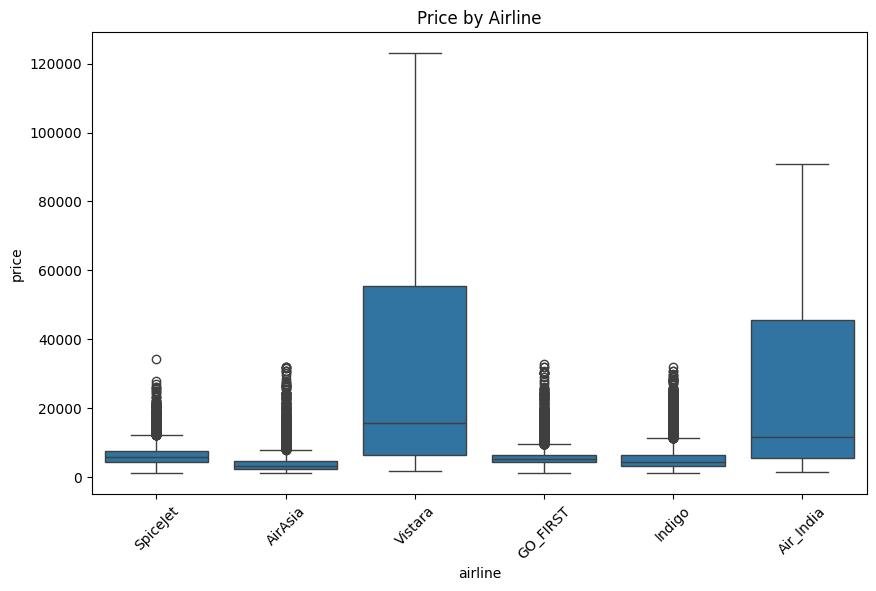

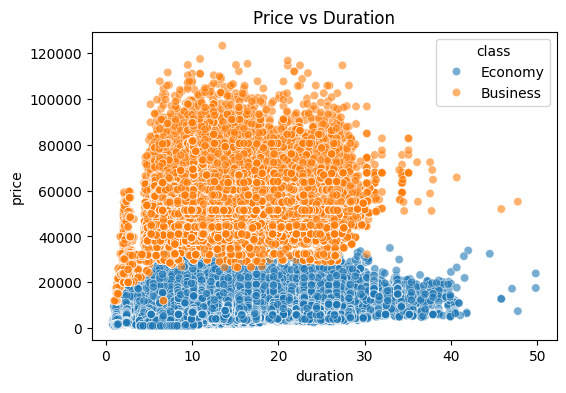

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


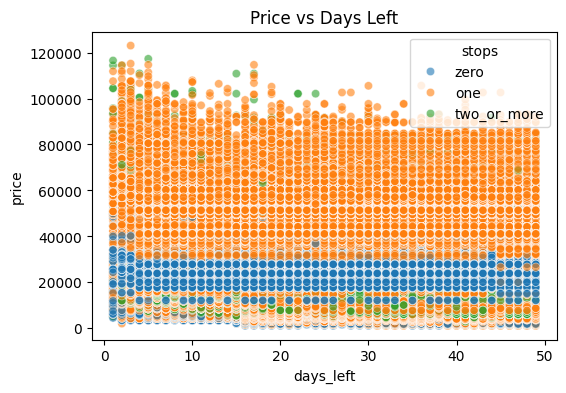

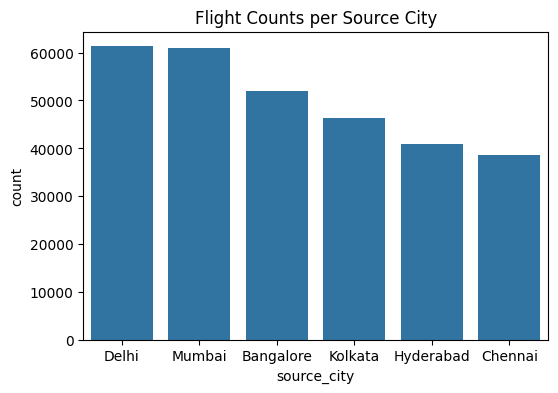

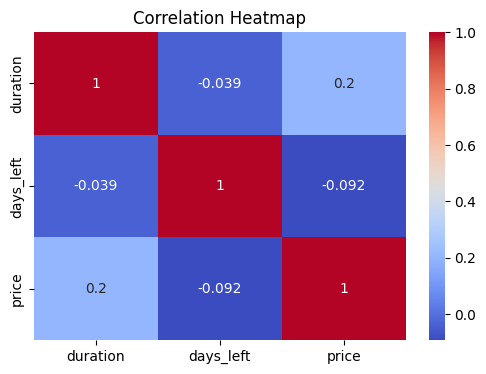

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="airline", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price by Airline")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="duration", y="price", hue="class", data=df, alpha=0.6)
plt.title("Price vs Duration")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="days_left", y="price", hue="stops", data=df, alpha=0.6)
plt.title("Price vs Days Left")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="source_city", data=df)
plt.title("Flight Counts per Source City")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[["duration","days_left","price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


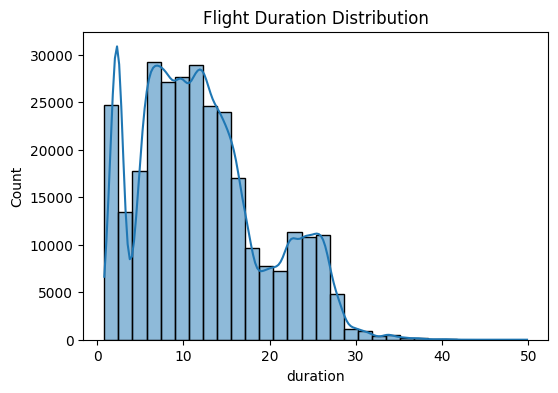

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


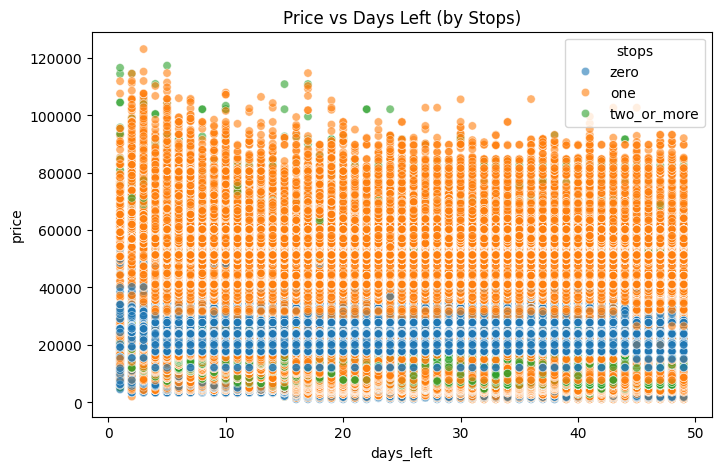

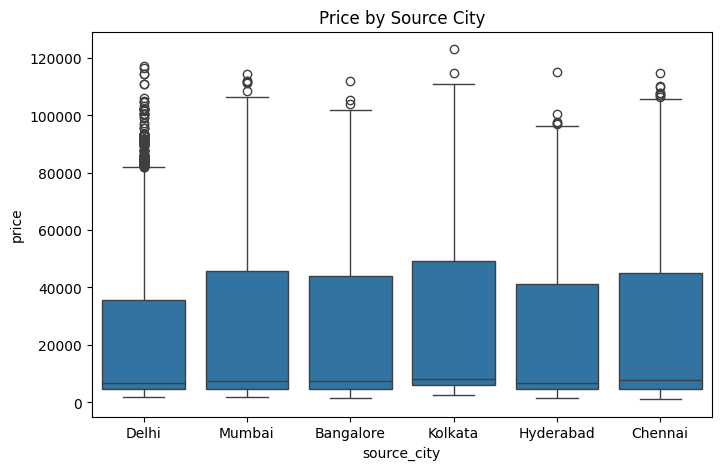

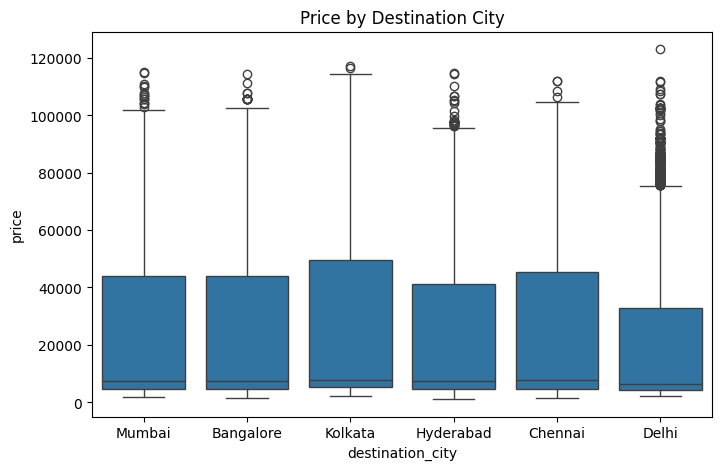

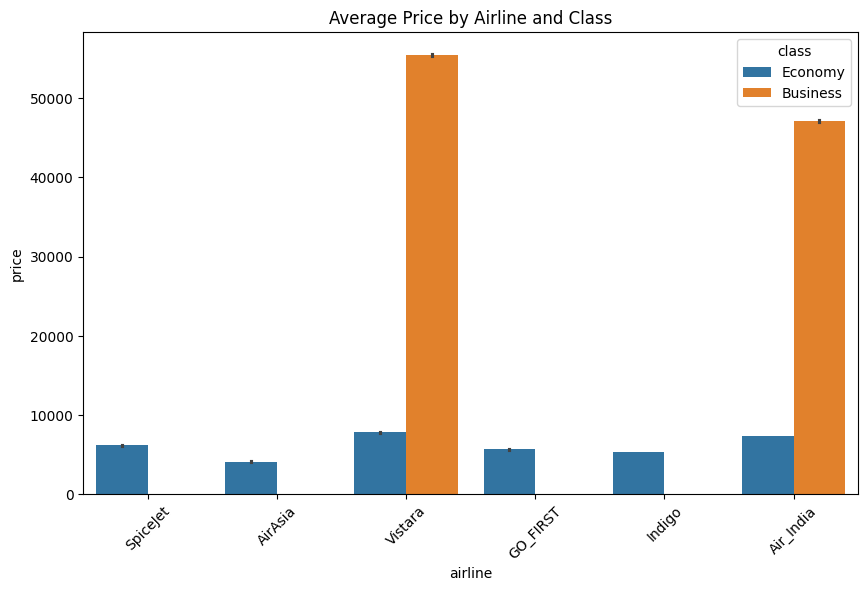

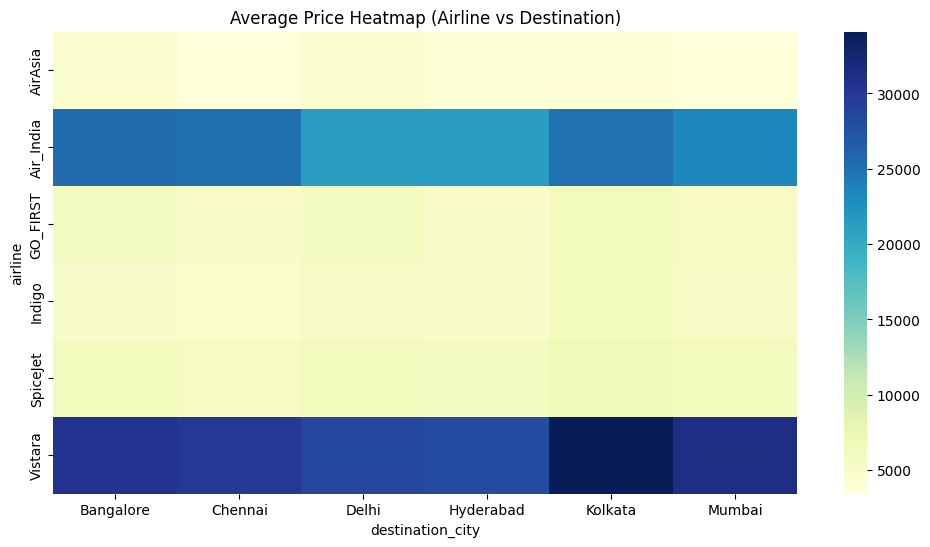

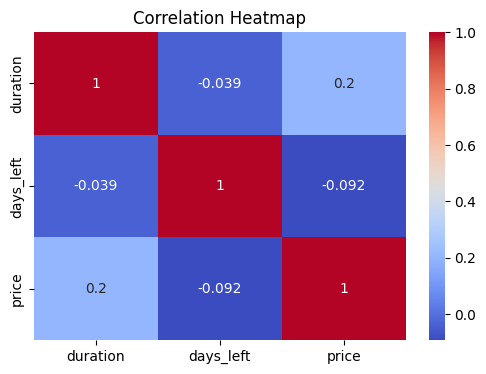

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df["duration"], kde=True, bins=30)
plt.title("Flight Duration Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="days_left", y="price", hue="stops", data=df, alpha=0.6)
plt.title("Price vs Days Left (by Stops)")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="source_city", y="price", data=df)
plt.title("Price by Source City")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x="destination_city", y="price", data=df)
plt.title("Price by Destination City")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="airline", y="price", hue="class", data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Price by Airline and Class")
plt.show()

pivot = df.pivot_table(index="airline", columns="destination_city", values="price", aggfunc="mean")
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Average Price Heatmap (Airline vs Destination)")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df[["duration","days_left","price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
